In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_csv = pd.read_csv('image_label.csv')

In [4]:
train_csv.head()

,id,path,file_name,absolute_path,label
0,000001,000001_female_Asian_45,incorrect_mask.jpg,/opt/ml/input/data/train/images/000001_female_...,10
1,000001,000001_female_Asian_45,mask4.jpg,/opt/ml/input/data/train/images/000001_female_...,4
2,000001,000001_female_Asian_45,mask2.jpg,/opt/ml/input/data/train/images/000001_female_...,4
3,000001,000001_female_Asian_45,mask1.jpg,/opt/ml/input/data/train/images/000001_female_...,4
4,000001,000001_female_Asian_45,mask3.jpg,/opt/ml/input/data/train/images/000001_female_...,4


### class (0 ~ 17) 분류

In [10]:
y = []
for name, group in train_csv.groupby(['label']):
    y.append(len(group))

y

[2740,
 2045,
 415,
 3665,
 4090,
 545,
 548,
 409,
 83,
 733,
 818,
 109,
 548,
 409,
 83,
 733,
 818,
 109]

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


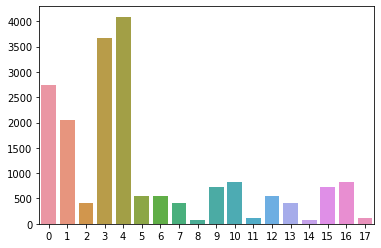

In [11]:
sns.barplot(np.unique(train_csv['label']),y)

In [13]:
len(train_csv.loc[train_csv['label'] == 17])

109

### 성별 분류

In [33]:
train_origin = pd.read_csv('train3.csv')

In [34]:
male_cnt = len(train_origin.loc[train_origin.gender == 'male'])
female_cnt = len(train_origin.loc[train_origin.gender == 'female'])

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


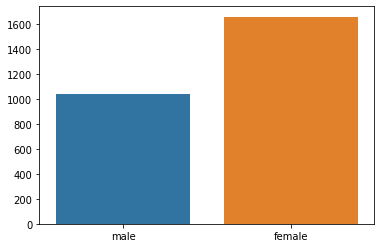

In [35]:
sns.barplot(['male', 'female'], [male_cnt, female_cnt])

### 나이별 분류

In [36]:
def age_categoring(age):
    if age < 30 : return 0
    elif 30 <= age < 60: return 1
    else: return 2

In [37]:
train_origin['age_category'] = train_origin['age'].apply(age_categoring)

In [45]:
age_cate0 = len(train_origin.loc[train_origin.age_category == 0])
age_cate1 = len(train_origin.loc[train_origin.age_category == 1])
age_cate2 = len(train_origin.loc[train_origin.age_category == 2])

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


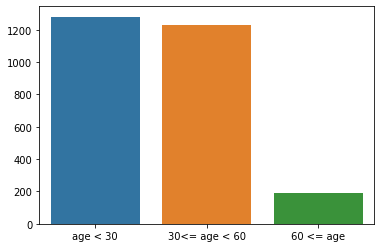

In [46]:
x = ['age < 30', '30<= age < 60', '60 <= age']
y = [age_cate0, age_cate1, age_cate2]

sns.barplot(x,y)